In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [10]:
def infec(N, V, M, eta, r_in, inhib, T_LI, T_LO):
    #Arrays counting progress towards LI and LO
    active = np.zeros(N, dtype = bool)
    dead = np.zeros(N, dtype = bool)
    LI = np.zeros(N)
    LO = np.zeros(N)

    #Initial conditions
    time = 0
    t = []
    states_LI = []
    states_LO = []

    #Infection rates
    r_out = eta * M/V

    N = np.count_nonzero(~dead)
    A = np.count_nonzero(active)
    while np.any(~dead):
        #Draw random numbers and collect transition time
        W = r_in * A + r_out * N
        x1, x2 = [np.random.uniform(0,1), np.random.uniform(0,1)]
        tau = -1/W * np.log(x1)

        if N * r_out >= x2 * W: #LO progress
            indices = np.where(~dead)[0]
            Bac = np.random.choice(indices)
            active[Bac] = True
            LO[Bac] += 1
            LI[Bac] = max(0, LI[Bac] - inhib)
            M -= 1

            if LO[Bac] >= T_LO: #LO occurs
                active[Bac] = False
                dead[Bac] = True
                M += 100
            
            r_out = eta * M/V
        
        else: #LI progress
            indices = np.where(active & ~dead)[0]
            Bac = np.random.choice(indices)

            LI[Bac] += 1

            if LI[Bac] >= T_LI: #LI occurs
                active[Bac] = False
                dead[Bac] = True
                M += 100
                r_out = eta * M/V

        N = np.count_nonzero(~dead)
        A = np.count_nonzero(active)

        time += tau
        states_LI.append(LI.copy())
        states_LO.append(LO.copy())
        t.append(time)

    return t, states_LO, states_LI


C:\Users\Ben12\AppData\Local\Temp\ipykernel_15732\259003583.py:7: UserWarning: Ignoring specified arguments in this call because figure with num: 0 already exists
  plt.figure(0, figsize = (5,5))
C:\Users\Ben12\AppData\Local\Temp\ipykernel_15732\259003583.py:10: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  plt.figure(1, figsize = (5,5))


959
41


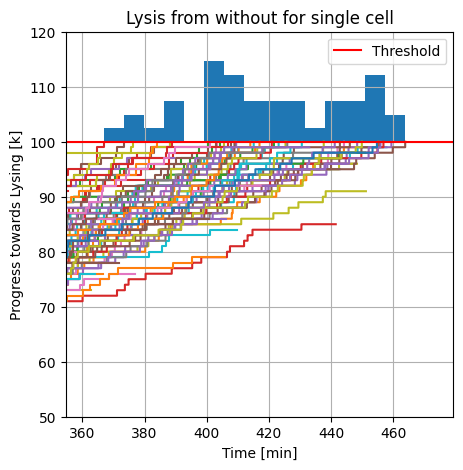

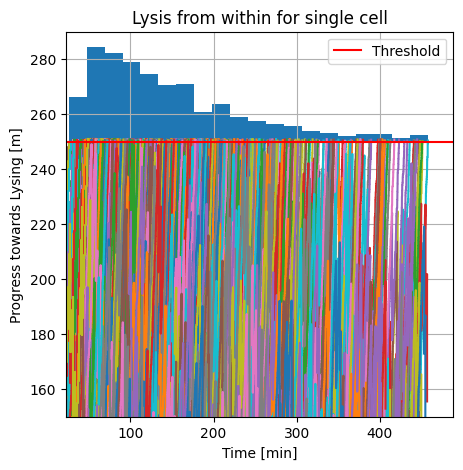

In [13]:
t_LI = []
t_LO = []

for i in range(1000):
    t, states_LO, states_LI = infec(N = 1, V = 0.01, M = 10**6, eta = 2 * 10**(-9), r_in = 250/27, inhib = 250/27 * 5, T_LI = 250, T_LO = 100)
    
    plt.figure(0, figsize = (5,5))
    plt.step(t, states_LO, where = 'post')

    plt.figure(1, figsize = (5,5))
    plt.step(t, states_LI, where = 'post')

    if states_LO[-1] == 100:
        t_LO.append(t[-1])
    
    elif states_LI[-1] >= 250:
        t_LI.append(t[-1])



#Lysis from without plot
plt.figure(0)
plt.title('Lysis from without for single cell')
plt.grid()
if len(t_LO) > 0:
    t_max = np.max(t_LO)
    t_min = np.min(t_LO)
    plt.plot(np.arange(0, np.round(t_max + t_max/5)), 100 * np.ones(round(t_max + t_max/5)), color = 'red', label = 'Threshold')
    plt.hist(t_LO, bins = 15, weights = np.full(len(t_LO), 100/len(t_LO)), bottom = 100)
    plt.xlim(t_min - t_min/30, t_max + t_max/30)
    plt.ylim(50, 120)
plt.xlabel('Time [min]')
plt.ylabel('Progress towards Lysing [k]')
plt.legend()

#Lysis from within plot
plt.figure(1)
plt.title('Lysis from within for single cell')
plt.grid()
if len(t_LI) > 0:
    t_max = np.max(t_LI)
    t_min = np.min(t_LI)
    plt.plot(np.arange(0,np.round(t_max + t_max/5)), 250 * np.ones(round(t_max + t_max/5)), color = 'red', label = 'Threshold')
    plt.hist(t_LI, bins = 20, weights = np.full(len(t_LI), 250/len(t_LI)), bottom = 250)
    plt.xlim(t_min - t_min/7.5, t_max + t_max/15)
    plt.ylim(150, 290)
plt.xlabel('Time [min]')
plt.ylabel('Progress towards Lysing [m]')
plt.legend()
print(len(t_LI))
print(len(t_LO))

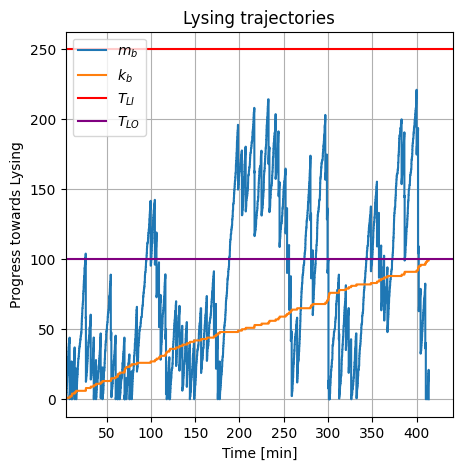

In [6]:
t_LI = []
t_LO = []

for i in range(1):
    t, states_LO, states_LI = infec(N = 1, V = 0.01, M = 1.2*10**6, eta = 2 * 10**(-9), r_in = 250/27, inhib = 250/27 * 5, T_LI = 250, T_LO = 100)
    
    plt.figure(0, figsize = (5,5))
    plt.step(t, states_LI, where = 'post', label = '$m_b$')
    plt.step(t, states_LO, where = 'post', label = '$k_b$')



#Lysis from without plot
t_max = np.max(t)
t_min = np.min(t)
plt.figure(0)
plt.title('Lysing trajectories')
plt.legend()
plt.grid()
plt.plot(np.arange(0,np.round(t_max + t_max/5)), 250 * np.ones(round(t_max + t_max/5)), color = 'red', label = '$T_{LI}$')
plt.plot(np.arange(0, np.round(t_max + t_max/5)), 100 * np.ones(round(t_max + t_max/5)), color = 'purple', label = '$T_{LO}$')
plt.xlim(t_min - t_min/7.5, t_max + t_max/15)
plt.xlabel('Time [min]')
plt.ylabel('Progress towards Lysing')
plt.legend()

47


C:\Users\Ben12\AppData\Local\Temp\ipykernel_15732\1709125687.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


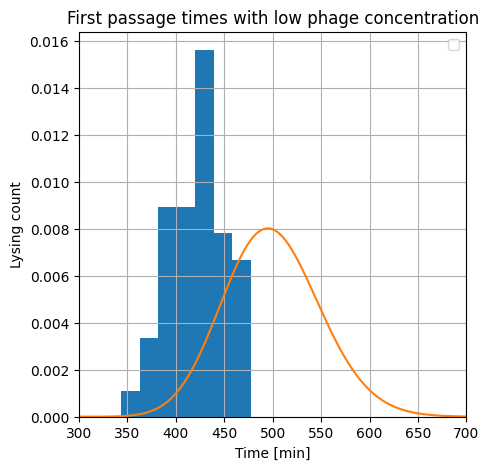

In [7]:
def erlang(x, L, k):
    return L**(k) * x**(k - 1) * np.exp(-L * x) / m.factorial(k - 1)

t_LO = []

for i in range(1000):
    t, states_LO, states_LI = infec(N = 1, V = 0.01, M = 10**6, eta = 2 * 10**(-9), r_in = 250/27, inhib = 250/27 * 5, T_LI = 250, T_LO = 100)

    if states_LO[-1] == 100:
        t_LO.append(t[-1])
    



#Lysis from without plot
plt.figure(figsize=(5,5))
plt.title('First passage times with low phage concentration')
plt.grid()
if len(t_LO) > 0:
    t_max = np.max(t_LO)
    t_min = np.min(t_LO)
    plt.hist(t_LO, bins = 7, density = True)
plt.xlabel('Time [min]')
plt.ylabel('Lysing count')
plt.legend()

x = np.linspace(0, max(t_LO) + 300, 1000)
y = erlang(x, 10**6 * 2 * 10**(-9) / 0.01, 100)
plt.xlim()
plt.plot(x,y)
plt.xlim(300, 700)
print(len(t_LO))

1000


C:\Users\Ben12\AppData\Local\Temp\ipykernel_15732\2067241581.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


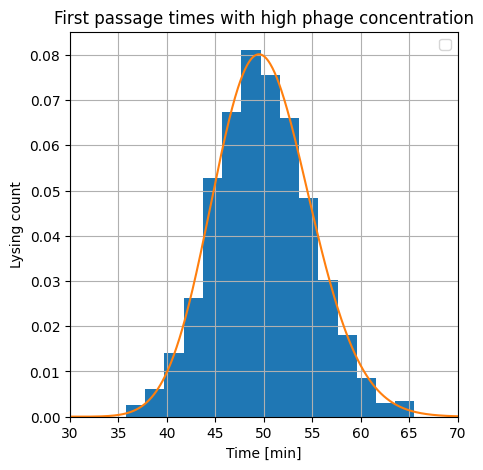

In [8]:
def erlang(x, L, k):
    return L**(k) * x**(k - 1) * np.exp(-L * x) / m.factorial(k - 1)

t_LO = []

for i in range(1000):
    t, states_LO, states_LI = infec(N = 1, V = 0.01, M = 10**7, eta = 2 * 10**(-9), r_in = 250/27, inhib = 250/27 * 5, T_LI = 250, T_LO = 100)

    if states_LO[-1] == 100:
        t_LO.append(t[-1])
    



#Lysis from without plot
plt.figure(figsize=(5,5))
plt.title('First passage times with high phage concentration')
plt.grid()
if len(t_LO) > 0:
    t_max = np.max(t_LO)
    t_min = np.min(t_LO)
    plt.hist(t_LO, bins = 15, density = True)
plt.xlabel('Time [min]')
plt.ylabel('Lysing count')
plt.legend()

x = np.linspace(0, max(t_LO) + 10, 1000)
y = erlang(x, 10**7 * 2 * 10**(-9) / 0.01, 100)
plt.plot(x,y)
plt.xlim(30, 70)
print(len(t_LO))